In [2]:
import torch

In [3]:
import torch.nn as nn
# import torch.nn.functional as F
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn.functional as F

In [4]:
dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())#download = True

In [ ]:
#i did it just for ones in the dataset
targetLabel = 1

# Create a mask for the specific label
mask = dataset.targets == targetLabel

# Apply the mask to filter the dataset
filteredData = dataset.data[mask]
filteredLabels = dataset.targets[mask]

filteredDataset = torch.utils.data.TensorDataset(filteredData, filteredLabels)
print(f"Number of samples with label {targetLabel}: {len(filteredDataset)}")


Number of samples with label 1: 6742


In [7]:
# we lower the dimension of the data from 28*28 to 14*14
maxPooling = nn.MaxPool2d(2, stride=2)
pooledData = maxPooling(filteredData)
print("Output Size:",pooledData.size()[0])

Output Size: 6742


In [8]:
# converting [6742, 14, 14] to [6742, 196]
flattenedData = torch.flatten(pooledData, start_dim=1, end_dim=2)

In [ ]:
# i tried to convert he regression to clasification, each 0.05 is considered a class
normalchainSequence = ((((flattenedData/255.0)* 20.0).round_() /20.0)/0.05)
normalchainSequence = normalchainSequence.type(torch.int16)
normalchainSequence = normalchainSequence.long()

In [10]:
# converting [6742, 196] to a long Sequence of pixels
x = torch.flatten(normalchainSequence, start_dim=0, end_dim=1)
y = torch.cat((x[1:], torch.tensor([0])))

In [11]:
# print(flattenedData[0])
# print(pooledData[0])
# print(chainSequence[:196])
# print(targertChainSequence[:196])

In [12]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((21, 21), generator=g, requires_grad=True)

In [13]:
num = x.nelement()
# forward pass
oneHot = F.one_hot(x, num_classes=21).float()
logits = oneHot @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

loss = -probs[torch.arange(num), y].log().mean() + 0.01*(W**2).mean()
#
print(loss)

# backward propegation
W.grad = None
loss.backward()
W.data += -1 * W.grad

tensor(2.6027, grad_fn=<AddBackward0>)


In [ ]:
num = x.nelement()

for k in range(2000):

    oneHot = F.one_hot(x, num_classes=21).float()
    logits = oneHot @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), y].log().mean()
    #  + 0.01*(W**2).mean()

    W.grad = None
    loss.backward()
    W.data += -1 * W.grad


print(loss.item())

In [ ]:
g = torch.Generator().manual_seed(2147483647)
for i in range(1):
  
  out = []
  ix = 0
  ii = 0
  while True:

    xenc = F.one_hot(torch.tensor([ix]), num_classes=21).float()
    logits = xenc @ W 
    counts = logits.exp() 
    p = counts / counts.sum(1, keepdims=True) 

    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(ix)

    ii= ii+1

    if ii == 14*14:
      break
  print(out)
  plt.imshow(torch.tensor(out).view(14, 14), cmap = 'gray')

[0, 0, 0, 0, 4, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 15, 16, 19, 13, 7, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 0, 0, 0, 6, 15, 20, 20, 20, 20, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 13, 6, 19, 6, 9, 14, 0, 0, 0, 0, 0, 19, 14, 18, 19, 10, 10, 9, 13, 19, 13, 19, 0, 0, 8, 4, 4, 7, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


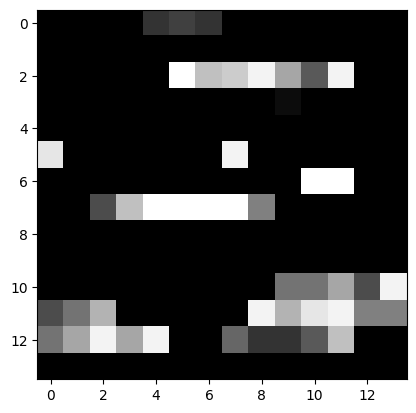